# Example 2: Creating Masks

In this example we show how to create masks using `create_mask.py`.

Often it is convenient to consider only a reduced Region of Interest (ROI) when analyzing the data. In order to do this we need to create a mask. The masks are boolean arrays where pixels labelled as `True` are masked and those labelled `False` are unmasked. In this notebook we give examples of how to create various masks.

The masks are created by `create_mask.py` and can be passed to an instance of `nptfit` via the function `load_mask` for a run, or an instance of `dnds_analysis` via `load_mask_analysis` for an analysis. If no mask is specified the code defaults to the full sky as the ROI.

**NB:** Before you can call functions from NPTFit, you must have it installed. Instructions to do so can be found here: 

http://nptfit.readthedocs.io/

In [1]:
# Import relevant modules

%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import healpy as hp
from matplotlib import rcParams

from NPTFit import create_mask as cm # Module for creating masks

## Example 1: Mask Nothing

If no options are specified, create mask returns an empty mask. In the plot here and for those below, blue represents unmasked, red masked.

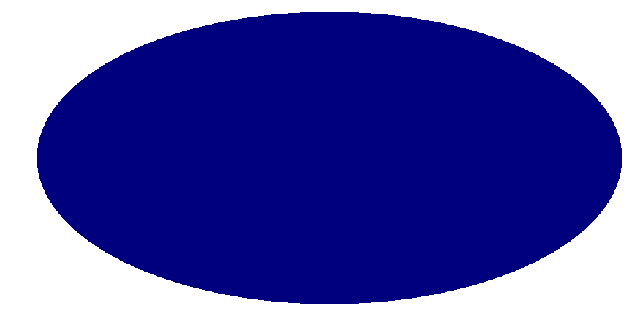

In [2]:
example1 = cm.make_mask_total()
hp.mollview(example1, title='', cbar=False, min=0,max=1)

## Example 2: Band Mask

Here we show an example of how to mask a region either side of the plane - specifically we mask 30 degrees either side

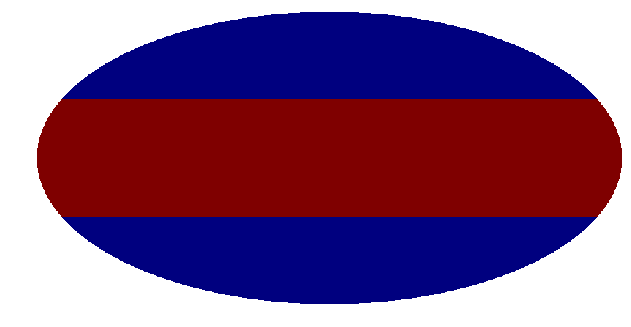

In [3]:
example2 = cm.make_mask_total(band_mask = True, band_mask_range = 30)
hp.mollview(example2, title='', cbar = False, min=0, max=1)

## Example 3: Mask outside a band in _b_ and _l_

This example shows several methods of masking outside specified regions in galactic longitude (_l_) and latitude (_b_). The third example shows how when two different masks are specified, the mask returned is the combination of both.

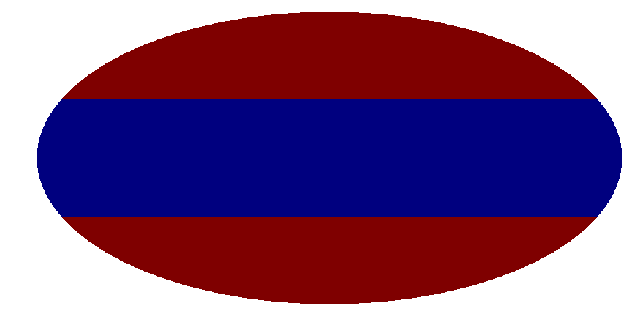

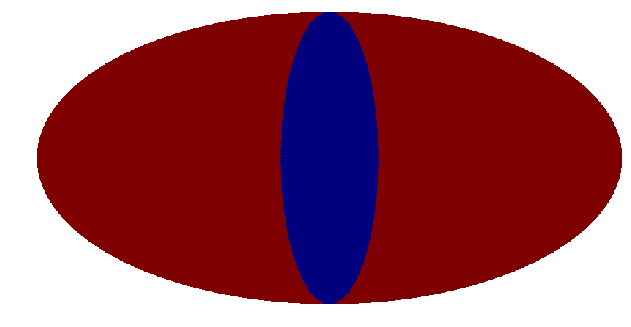

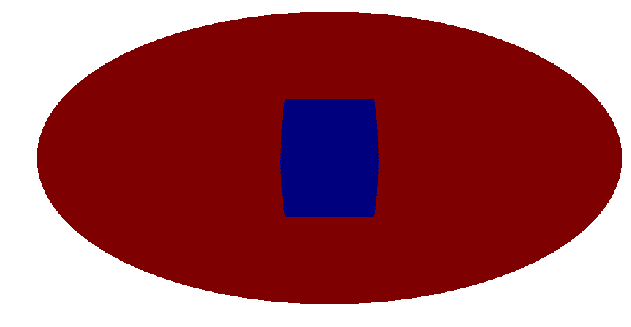

In [4]:
example3a = cm.make_mask_total(l_mask = False, l_deg_min = -30, l_deg_max = 30, 
                               b_mask = True, b_deg_min = -30, b_deg_max = 30)
hp.mollview(example3a,title='',cbar=False,min=0,max=1)

example3b = cm.make_mask_total(l_mask = True, l_deg_min = -30, l_deg_max = 30, 
                               b_mask = False, b_deg_min = -30, b_deg_max = 30)
hp.mollview(example3b,title='',cbar=False,min=0,max=1)

example3c = cm.make_mask_total(l_mask = True, l_deg_min = -30, l_deg_max = 30, 
                              b_mask = True, b_deg_min = -30, b_deg_max = 30)
hp.mollview(example3c,title='',cbar=False,min=0,max=1)

## Example 4: Ring and Annulus Mask

Next we show examples of masking outside a ring or annulus. The final example demonstrates that the ring need not be at the galactic center.

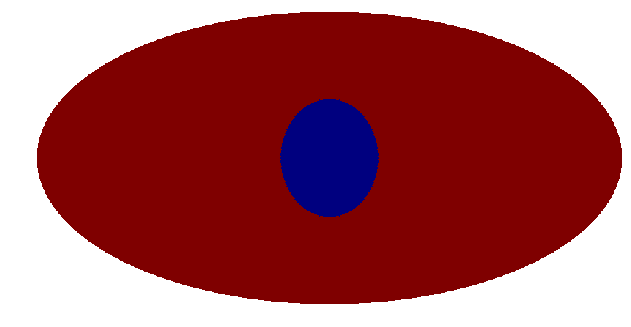

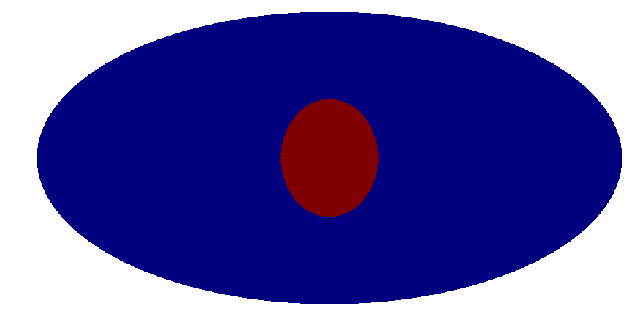

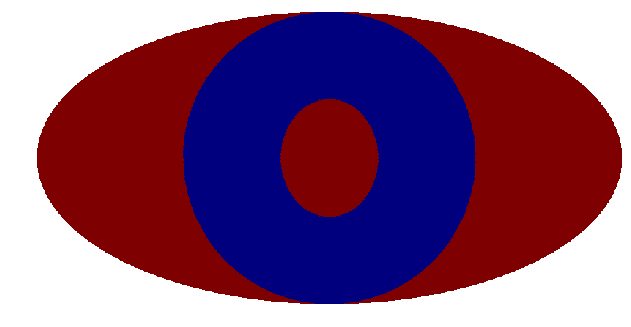

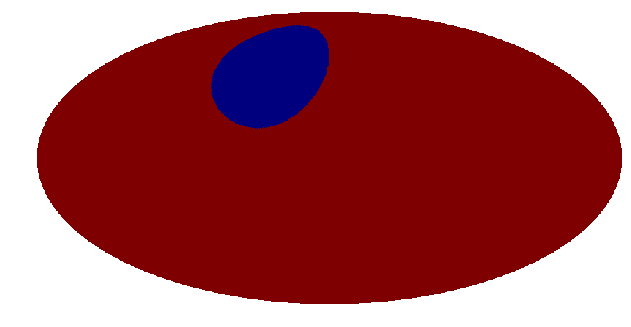

In [5]:
example4a = cm.make_mask_total(mask_ring = True, inner = 0, outer = 30, ring_b = 0, ring_l = 0)
hp.mollview(example4a,title='',cbar=False,min=0,max=1)

example4b = cm.make_mask_total(mask_ring = True, inner = 30, outer = 180, ring_b = 0, ring_l = 0)
hp.mollview(example4b,title='',cbar=False,min=0,max=1)

example4c = cm.make_mask_total(mask_ring = True, inner = 30, outer = 90, ring_b = 0, ring_l = 0)
hp.mollview(example4c,title='',cbar=False,min=0,max=1)

example4d = cm.make_mask_total(mask_ring = True, inner = 0, outer = 30, ring_b = 45, ring_l = 45)
hp.mollview(example4d,title='',cbar=False,min=0,max=1)

## Example 5: Custom Mask

In addition to the options above, we can also add in custom masks. In this example we highlight this by adding a random mask.

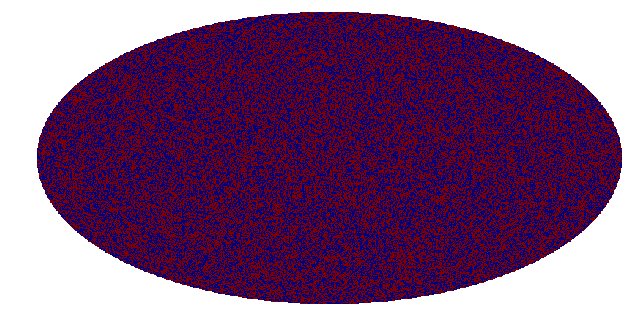

In [6]:
random_custom_mask = np.random.choice(np.array([True, False]), hp.nside2npix(128))
example5 = cm.make_mask_total(custom_mask = random_custom_mask)
hp.mollview(example5,title='',cbar=False,min=0,max=1)

## Example 6: Full Analysis Mask including Custom Point Source Catalog Mask

Finally we show an example of a full analysis mask that we will use for an analysis of the Galactic Center Excess in Example 3 and 7. Here we mask the plane with a band mask, mask outside a ring and also include a custom point source mask. The details of the point source mask are given in Example 1.

**NB:** before the point source mask can be loaded, the Fermi Data needs to be downloaded. See details in Example 1.

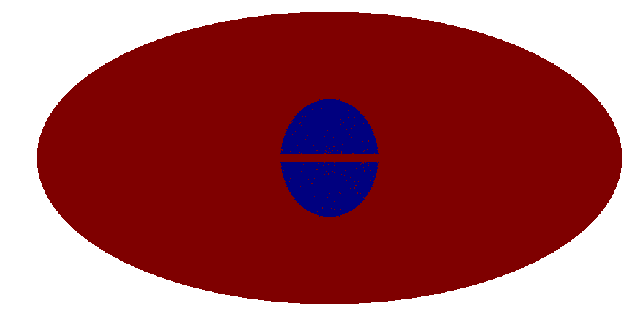

In [7]:
pscmask=np.array(np.load('fermi_data/fermidata_pscmask.npy'), dtype=bool)
example6 = cm.make_mask_total(band_mask = True, band_mask_range = 2,
                              mask_ring = True, inner = 0, outer = 30,
                              custom_mask = pscmask)
hp.mollview(example6,title='',cbar=False,min=0,max=1)